##### K-MEANS CLUSTERING

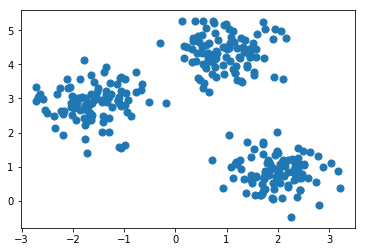

In [14]:
%matplotlib inline
# import the func that enables us to plot clusters
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

#Get points such that they form 3 visually separable cluster
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# plot the points on a scatterplot
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()


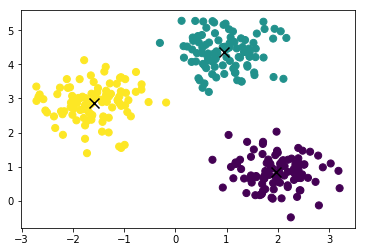

In [23]:
# import k-means class
from sklearn.cluster import KMeans

#initializer the k-Means objects. Set number of cluster to 3
#centroids initiliazation as 'random' and maximum iteration to 10
kmeans = KMeans(n_clusters=3, init='random',max_iter=10)

#compute the k-means clustering
kmeans.fit(X)

#predict the classes for every point
y_pred = kmeans.predict(X)

# plot the data points agains with different color for different classes
plt.scatter(X[:,0], X[:,1], c=y_pred, s=50)

# Get the list of the final centroids
centroids = kmeans.cluster_centers_

# plot the centroids onto the same scatterplots
plt.scatter(centroids[:, 0], centroids[:,1], c='black', s=100, marker='x')
plt.show()

##### Choosing K

In [20]:
# There are several ways fo determing a good value of K. 
# But we will explore the "Elbow method" of determing K

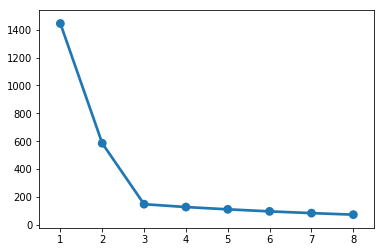

In [31]:
#Elbow method with scikit-learn
import seaborn as sns
#List that will hold the sum of square values for different cluster size
ss = []

# we will compute SS for cluster sizes between 1 & 8
for i in range(1,9):
    
    #initialzie the Kmeans object and call the fit method to compute cluster
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    #Append the value of SS for a particular iteration inot the ss list
    ss.append(kmeans.inertia_)
    
#plot the Elbow plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)],y=ss)
    

#### other clustering algorithms

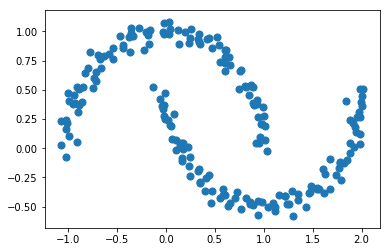

In [34]:
#Construct a plot with hafl moons

#import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
x_m, y_m = make_moons(200, noise=.05, random_state=0)

#plot the two half moon cluster
plt.scatter(x_m[:, 0], x_m[:,1], s=50)
plt.show()

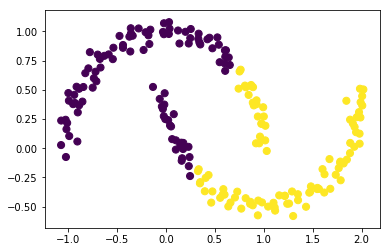

In [40]:
# initialize K-means object with K=2(for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random',max_iter=10)
kmm.fit(x_m)
#predict the classes for the data points
y_m_pred = kmm.predict(x_m)

#plot the colored cluster as identified by K-means
plt.scatter(x_m[:,0], x_m[:,1], c=y_m_pred, s=50)


In [41]:
# k-means doesn't do a good job of identifying the correct cluster
# for cluster such as these half moons, another algorith called 'spectral clustering'
# with nearest-neighbour affinity preforms much better

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


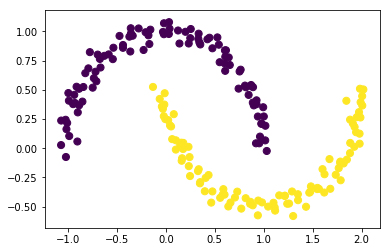

In [43]:
# will will go through spectral clustering

# import spectral clustering from scikit-learn
from sklearn.cluster import SpectralClustering

# Define the Spectral Clustering model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

# Fit & predict the labels
y_m_sc = model.fit_predict(x_m)

# plot the colored clusters as identified by Spectral Clustering
plt.scatter(x_m[:,0], x_m[:,1], c=y_m_sc, s=50)
 